In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import average_precision_score
from scipy.stats import spearmanr

In [2]:
test_set = pd.read_csv("../outputs/fp_analysis/test_predictions_lyric-sweep-30.csv")
test_set

,Peptide,HLA,Qualitative Measurement,Number of Subjects Tested,Number of Subjects Positive,Peptide length,Alpha,Beta,Distr. Mean,Distr. Variance,Allele Pseudo-sequence,Target,Sample,Peptide Length,Obs. Mean,Obs. Variance,Stratification_index,Prediction,Prediction Beta Mean,Prediction Beta Variance
0,DTDFVNEFY,HLA-A01:01,Positive,16.0,7.0,9,43.0,13.0,0.767857,0.003127,YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY,1,DTDFVNEFY_HLA-A01:01,9,0.444444,0.012995,HLA-A01:01_1,0.282232,0.147550,0.042842
1,PETSSKKPDY,HLA-B49:01,Negative,1.0,0.0,10,1.0,37.0,0.026316,0.000657,YHTKYREISTNTYENIAYWRYNLYTWAELAYLWY,0,PETSSKKPDY_HLA-B49:01,10,0.333333,0.055556,HLA-B49:01_0,0.107182,0.057703,0.019088
2,ITSKVKVINY,HLA-A30:02,Negative,1.0,0.0,10,1.0,37.0,0.026316,0.000657,YSAMYQENVAHTDENTLYIIYEHYTWARLAYTWY,0,ITSKVKVINY_HLA-A30:02,10,0.333333,0.055556,HLA-A30:02_0,0.152153,0.080997,0.025763
3,LSNGGLPAY,HLA-A29:02,Negative,3.0,0.0,9,1.0,39.0,0.025000,0.000595,YTAMYLQNVAQTDANTLYIMYRDYTWAVLAYTWY,0,LSNGGLPAY_HLA-A29:02,9,0.200000,0.026667,HLA-A29:02_0,0.094153,0.050881,0.017065
4,YEALYYVHSL,HLA-B40:02,Negative,2.0,0.0,10,1.0,38.0,0.025641,0.000625,YHTKYREISTNTYESNLYLSYNYYTWAVLAYEWY,0,YEALYYVHSL_HLA-B40:02,10,0.250000,0.037500,HLA-B40:02_0,0.329574,0.172000,0.048377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,QIYKTPPIK,HLA-A03:01,Negative,10.0,0.0,9,1.0,46.0,0.021277,0.000434,YFAMYQENVAQTDVDTLYIIYRDYTWAELAYTWY,0,QIYKTPPIK_HLA-A03:01,9,0.083333,0.005876,HLA-A03:01_0,0.232893,0.122303,0.036710
4504,PFESPNFTK,HLA-A11:01,Negative,2.0,0.0,9,1.0,38.0,0.025641,0.000625,YYAMYQENVAQTDVDTLYIIYRDYTWAAQAYRWY,0,PFESPNFTK_HLA-A11:01,9,0.250000,0.037500,HLA-A11:01_0,0.769713,0.453087,0.083435
4505,NYMCVDNHL,HLA-A24:02,Negative,5.0,0.0,9,1.0,41.0,0.023810,0.000541,YSAMYEEKVAHTDENIAYLMFHYYTWAVQAYTGY,0,NYMCVDNHL_HLA-A24:02,9,0.142857,0.015306,HLA-A24:02_0,0.208098,0.109645,0.033476
4506,VSDQFSVEF,HLA-C05:01,Negative,2.0,0.0,9,1.0,38.0,0.025641,0.000625,YYAGYREKYRQTDVNKLYLRYNFYTWAERAYTWY,0,VSDQFSVEF_HLA-C05:01,9,0.250000,0.037500,HLA-C05:01_0,0.903063,0.610676,0.080092


In [5]:
fp_df = test_set[(test_set["Target"]==0)&(test_set["Prediction"]>=0.5)]
fp_df

,Peptide,HLA,Qualitative Measurement,Number of Subjects Tested,Number of Subjects Positive,Peptide length,Alpha,Beta,Distr. Mean,Distr. Variance,Allele Pseudo-sequence,Target,Sample,Peptide Length,Obs. Mean,Obs. Variance,Stratification_index,Prediction,Prediction Beta Mean,Prediction Beta Variance
22,YVVKFVFEA,HLA-A02:01,Negative,10.0,0.0,9,1.0,46.0,0.021277,0.000434,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,0,YVVKFVFEA_HLA-A02:01,9,0.083333,0.005876,HLA-A02:01_0,0.529551,0.281957,0.068351
26,TINAVASRK,HLA-A11:01,Negative,10.0,0.0,9,1.0,46.0,0.021277,0.000434,YYAMYQENVAQTDVDTLYIIYRDYTWAAQAYRWY,0,TINAVASRK_HLA-A11:01,9,0.083333,0.005876,HLA-A11:01_0,0.927152,0.654539,0.076222
44,ASCMGLRY,HLA-B35:01,Negative,6.0,0.0,8,1.0,42.0,0.023256,0.000516,YYATYRNIFTNTYESNLYIRYDSYTWAVLAYLWY,0,ASCMGLRY_HLA-B35:01,8,0.125000,0.012153,HLA-B35:01_0,0.959018,0.732946,0.066115
45,YLLCCNYKL,HLA-A02:01,Negative,3.0,0.0,9,1.0,39.0,0.025000,0.000595,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,0,YLLCCNYKL_HLA-A02:01,9,0.200000,0.026667,HLA-A02:01_0,0.606648,0.329811,0.074531
70,ALLAGLVSLL,HLA-A02:01,Negative,2.0,0.0,10,1.0,38.0,0.025641,0.000625,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,0,ALLAGLVSLL_HLA-A02:01,10,0.250000,0.037500,HLA-A02:01_0,0.684487,0.383719,0.079669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4479,RLANECAQV,HLA-A02:01,Negative,16.0,0.0,9,1.0,52.0,0.018868,0.000343,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,0,RLANECAQV_HLA-A02:01,9,0.055556,0.002762,HLA-A02:01_0,0.870619,0.562590,0.082863
4492,RRDHRRKKAL,HLA-B27:02,Negative,1.0,0.0,10,1.0,37.0,0.026316,0.000657,YHTEYREICAKTDENIAYLNYHDYTWAVLAYEWY,0,RRDHRRKKAL_HLA-B27:02,10,0.333333,0.055556,HLA-B27:02_0,0.979243,0.810510,0.052092
4501,LYDKLVSSF,HLA-A24:02,Negative,5.0,0.0,9,1.0,41.0,0.023810,0.000541,YSAMYEEKVAHTDENIAYLMFHYYTWAVQAYTGY,0,LYDKLVSSF_HLA-A24:02,9,0.142857,0.015306,HLA-A24:02_0,0.557519,0.298813,0.070702
4504,PFESPNFTK,HLA-A11:01,Negative,2.0,0.0,9,1.0,38.0,0.025641,0.000625,YYAMYQENVAQTDVDTLYIIYRDYTWAAQAYRWY,0,PFESPNFTK_HLA-A11:01,9,0.250000,0.037500,HLA-A11:01_0,0.769713,0.453087,0.083435


In [6]:
fp_df["Number of Subjects Positive"].value_counts()

0.0    486
1.0      1
Name: Number of Subjects Positive, dtype: int64

In [7]:
test_set[(test_set["Target"]==0)]["Number of Subjects Positive"].value_counts()

0.0    3728
1.0       1
Name: Number of Subjects Positive, dtype: int64

In [8]:
cm_labels = []

for i, row in test_set.iterrows():
    if row.Target==1 and row.Prediction>=0.5:
        cm_labels.append("TP")
    elif row.Target==1 and row.Prediction<0.5:
        cm_labels.append("FN")
    elif row.Target==0 and row.Prediction>=0.5:
        cm_labels.append("FP")
    elif row.Target==0 and row.Prediction<0.5:
        cm_labels.append("TN")
        
test_set["CM Label"] = cm_labels
test_set

,Peptide,HLA,Qualitative Measurement,Number of Subjects Tested,Number of Subjects Positive,Peptide length,Alpha,Beta,Distr. Mean,Distr. Variance,...,Target,Sample,Peptide Length,Obs. Mean,Obs. Variance,Stratification_index,Prediction,Prediction Beta Mean,Prediction Beta Variance,CM Label
0,DTDFVNEFY,HLA-A01:01,Positive,16.0,7.0,9,43.0,13.0,0.767857,0.003127,...,1,DTDFVNEFY_HLA-A01:01,9,0.444444,0.012995,HLA-A01:01_1,0.282232,0.147550,0.042842,FN
1,PETSSKKPDY,HLA-B49:01,Negative,1.0,0.0,10,1.0,37.0,0.026316,0.000657,...,0,PETSSKKPDY_HLA-B49:01,10,0.333333,0.055556,HLA-B49:01_0,0.107182,0.057703,0.019088,TN
2,ITSKVKVINY,HLA-A30:02,Negative,1.0,0.0,10,1.0,37.0,0.026316,0.000657,...,0,ITSKVKVINY_HLA-A30:02,10,0.333333,0.055556,HLA-A30:02_0,0.152153,0.080997,0.025763,TN
3,LSNGGLPAY,HLA-A29:02,Negative,3.0,0.0,9,1.0,39.0,0.025000,0.000595,...,0,LSNGGLPAY_HLA-A29:02,9,0.200000,0.026667,HLA-A29:02_0,0.094153,0.050881,0.017065,TN
4,YEALYYVHSL,HLA-B40:02,Negative,2.0,0.0,10,1.0,38.0,0.025641,0.000625,...,0,YEALYYVHSL_HLA-B40:02,10,0.250000,0.037500,HLA-B40:02_0,0.329574,0.172000,0.048377,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,QIYKTPPIK,HLA-A03:01,Negative,10.0,0.0,9,1.0,46.0,0.021277,0.000434,...,0,QIYKTPPIK_HLA-A03:01,9,0.083333,0.005876,HLA-A03:01_0,0.232893,0.122303,0.036710,TN
4504,PFESPNFTK,HLA-A11:01,Negative,2.0,0.0,9,1.0,38.0,0.025641,0.000625,...,0,PFESPNFTK_HLA-A11:01,9,0.250000,0.037500,HLA-A11:01_0,0.769713,0.453087,0.083435,FP
4505,NYMCVDNHL,HLA-A24:02,Negative,5.0,0.0,9,1.0,41.0,0.023810,0.000541,...,0,NYMCVDNHL_HLA-A24:02,9,0.142857,0.015306,HLA-A24:02_0,0.208098,0.109645,0.033476,TN
4506,VSDQFSVEF,HLA-C05:01,Negative,2.0,0.0,9,1.0,38.0,0.025641,0.000625,...,0,VSDQFSVEF_HLA-C05:01,9,0.250000,0.037500,HLA-C05:01_0,0.903063,0.610676,0.080092,FP


In [31]:
test_set2 = test_set[test_set["Number of Subjects Tested"]>=20]
print(len(test_set2))
average_precision_score(test_set2["Target"], test_set2["Prediction Beta Mean"])

227


0.834270203771549

In [32]:
test_set["Qualitative Measurement"].unique()

array(['Positive', 'Negative', 'Positive-Low', 'Positive-High',
       'Positive-Intermediate'], dtype=object)

<Axes: xlabel='CM Label', ylabel='Number of Subjects Tested'>

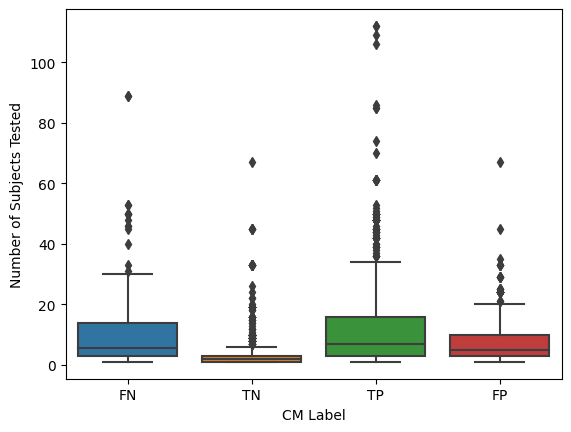

In [15]:
sns.boxplot(test_set, x="CM Label", y="Number of Subjects Tested")

<Axes: xlabel='CM Label', ylabel='Number of Subjects Positive'>

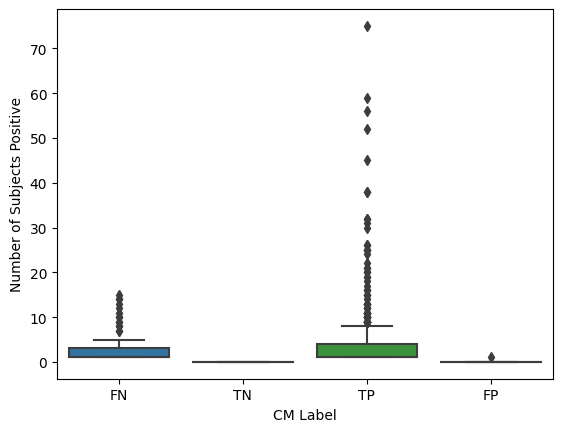

In [16]:
sns.boxplot(test_set, x="CM Label", y="Number of Subjects Positive")

<Axes: xlabel='CM Label', ylabel='Alpha'>

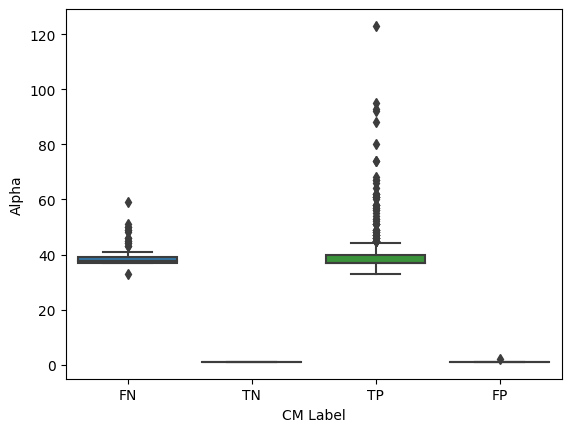

In [17]:
sns.boxplot(test_set, x="CM Label", y="Alpha")

<Axes: xlabel='CM Label', ylabel='Obs. Mean'>

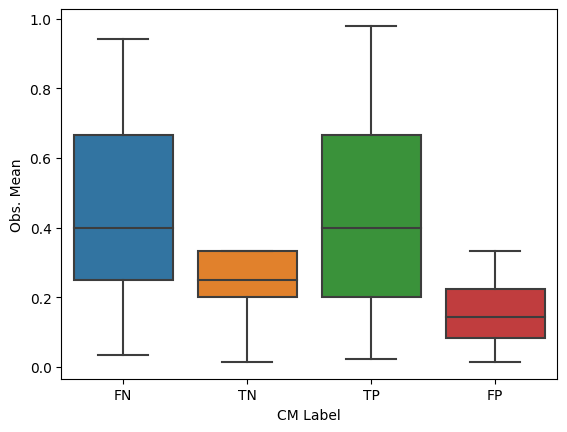

In [19]:
sns.boxplot(test_set, x="CM Label", y="Obs. Mean")

<Axes: xlabel='CM Label', ylabel='Obs. Variance'>

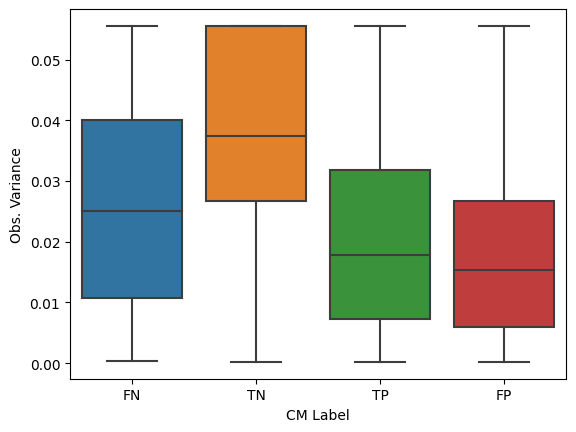

In [20]:
sns.boxplot(test_set, x="CM Label", y="Obs. Variance")

<Axes: xlabel='CM Label', ylabel='Prediction'>

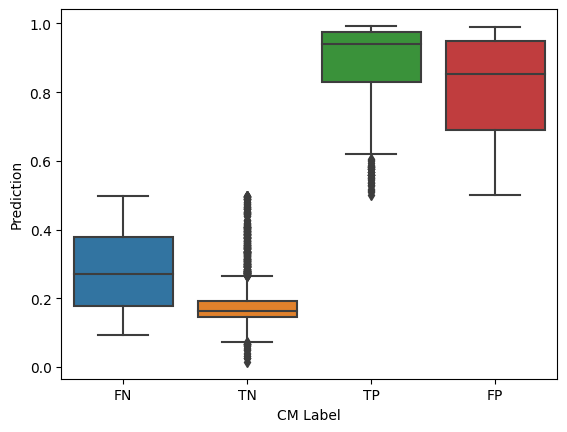

In [21]:
sns.boxplot(test_set, x="CM Label", y="Prediction")

<Axes: xlabel='CM Label', ylabel='Peptide length'>

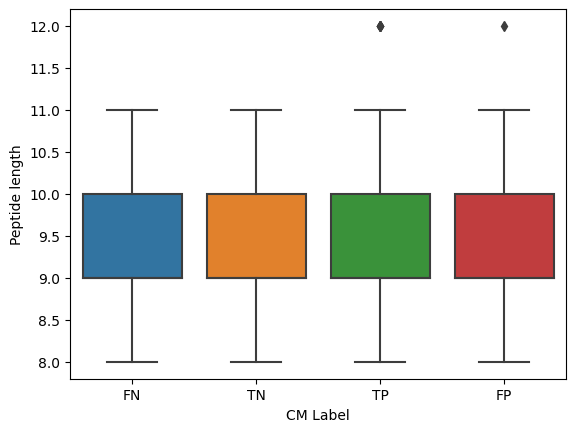

In [22]:

sns.boxplot(test_set, x="CM Label", y="Peptide length")

In [39]:
import torch.nn as nn
import torch
class BetaPriorsEmbedding(nn.Module):
    def __init__(self):
        super().__init__()
        self.embs = nn.Embedding(5, 2)
        nn.init.normal_(self.embs.weight, mean=0, std=0.01)

    def forward(self, idx):
        return torch.exp(self.embs(idx))


In [40]:
bpe = BetaPriorsEmbedding()

In [42]:
idx = torch.LongTensor([0,1])
bpe(idx)

tensor([[1.0014, 0.9883],
        [1.0066, 0.9984]], grad_fn=<ExpBackward0>)